In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

In [17]:
price  = './datasets/house price portaland/ex1data2.txt'
df_price = pd.read_csv(price, header=None)

In [18]:
df_price.columns = (['Size', 'Bedroom', 'Price'])
df_price.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [19]:
df_price.describe()

,Size,Bedroom,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


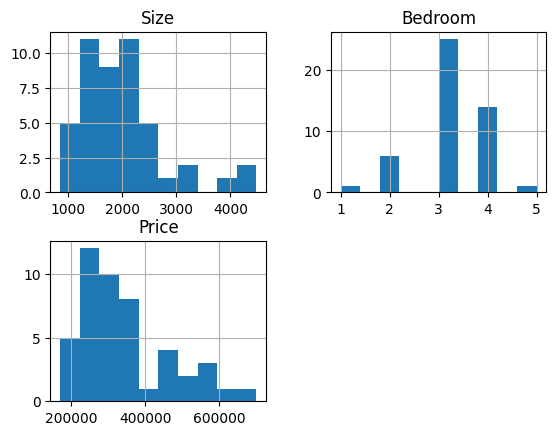

In [20]:
df_price.hist()
plt.show()


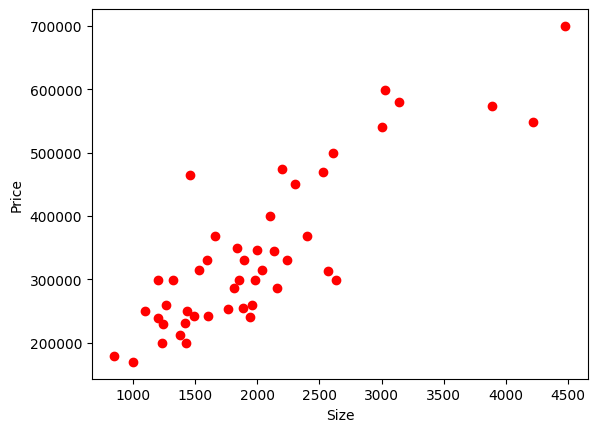

In [21]:
plt.scatter(df_price.Size, df_price.Price, color = 'red')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [22]:
mask = np.random.rand(len(df_price)) < 0.8
train = df_price[mask]
test = df_price[~mask]

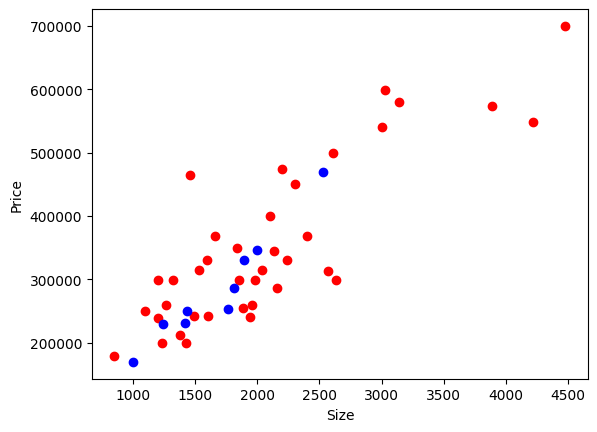

In [23]:
fig  = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.Size, train.Price, color = 'red')
ax1.scatter(test.Size, test.Price, color = 'blue')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [24]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Size']])
train_y = np.asanyarray(train[['Price']])
regr.fit(train_x, train_y)
print("cof: ", regr.coef_)
print("Insp: ", regr.intercept_)

cof:  [[129.78318021]]
Insp:  [83869.29092005]


Text(0, 0.5, 'Price')

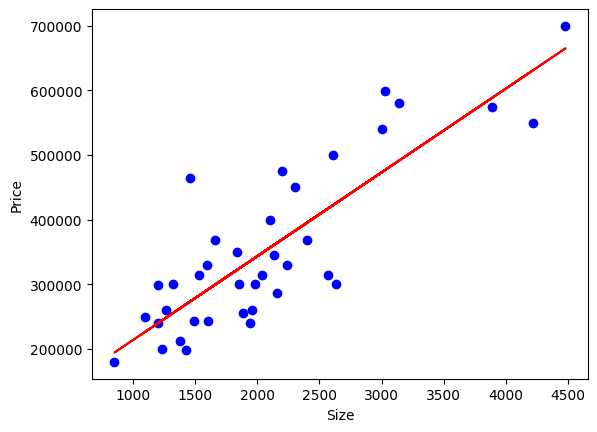

In [25]:
plt.scatter(train.Size, train.Price, color = 'blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')
plt.xlabel("Size")
plt.ylabel("Price")

In [26]:
test_x = np.asanyarray(test[['Size']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2 ))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 29959.80
Residual sum of squares (MSE): 1315925719.81
R2-score: 0.81
